## Этап 1. Открываю данные и получаю общую информацию о датасете

### Импортирую библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings

In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Этап 2. Подготовка данных

### Привожу названия столбцов к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()

### Оцениваю пропуски

In [6]:
missing_data = data.isna().sum()
missing_data_percentage = ((missing_data / len(data)) * 100).round(2)
missing_data_df = pd.DataFrame({
    'Количество пропусков': missing_data,
    'Процент пропусков': missing_data_percentage
})
missing_data_df[(missing_data_df['Количество пропусков'] > 0)]

,Количество пропусков,Процент пропусков
name,2,0.01
year_of_release,269,1.61
genre,2,0.01
critic_score,8578,51.32
user_score,6701,40.09
rating,6766,40.48


Удаляем строки с пропусками в названии и жанре, так как их количество незначительно.

In [7]:
data = data.dropna(subset=['genre', 'name'])

Рассмотрим пропуски в годе выпуска.

In [8]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Также удаляю строки с пропусками, так как их количество незначительно (1.6%).

In [9]:
data = data.dropna(subset=['year_of_release'])

Рассмотрим данные с пропусками рейтинга.

In [10]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски в рейтинге заменяю заглушкой - unknown, так как категориальный признак.

In [11]:
data['rating'] = data['rating'].fillna('unknown')

Рассматриваю пропуски в столбцах critic_score и user_score.

In [12]:
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [13]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Заполнение пропусков в critic_score и user_score универсальными значениями некорректно, так как каждая игра может иметь уникальную оценку. При этом исключать такое большое количество строк, содержащее пропуски в этом столбцах, нерационально. Заполняю количественной заглушкой: заменяю пропуски на значение 101 в critic_score (т.к. диапазон до 100) и на 11 в user_score (т.к. диапазон до 10).

In [14]:
data['user_score'] = data['user_score'].fillna(11)

In [15]:
data['critic_score'] = data['critic_score'].fillna(101)

Рассмотрю срез, где user_score принимает значение tbd.

In [16]:
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,101.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,101.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,101.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,101.0,tbd,E


Аббревиатура 'tbd' означает to be detrmined, то есть оценка по данным играм еще не определена, можно заменить данные значения также на 11 (значение вне диапазона).

In [17]:
data['user_score'] = data['user_score'].replace('tbd', '11')

### Причины, которые могли привести к пропускам

Были обнаружены пропуски в следующих столбцах: name, year_of_release, genre, critic_score, user_score, rating.
Многие строки содержат пропуски одновременно в critic_score, user_score, rating, что говорит о региональных особенностях рынка, с которого были получены данные. Система рейтинга/оценок одного региона просто отсутствует в другом.
Пропуски в других данных также не отличает какая-либо системность, что позволяет сделать вывод о технической ошибке, которая привела к возникновению пропусков.

### Оценим количество явных дубликатов

In [18]:
data.duplicated().sum()

0

### Преобразовываю данные к нужному типу

In [19]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [20]:
data['user_score'] = data['user_score'].astype('float')

- Меняем тип данных в столбце year_of_release, т.к. для значений года нам не требуются вещественные числа.
- Меняем тип данных в столбце user_score, т.к. для оценок пользователей нам нужны вещественный числа.

### Добавляю отдельный столбец с суммарными продажами во всех регионах

In [21]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [22]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,101.0,11.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,101.0,11.0,unknown,31.38


### Вывод

В ходе предобработки данных:
- Были выявлены пропуски в столбцах name, year_of_release, genre, critic_score, user_score, rating.
- Строки с пропусками в year_of_release были удалены (1.6% от всех данных).
- Строки с пропусками в name, genre были удалены (<0.01% от всех данных).
- Пропуски в rating были заменены на 'unknown'.
- Пропуски в user_score и critic_score были заменены на значения вне их диапазона.
- Был изменен тип данных в столбце year_of_release, т.к. для года не требуются вещественные числа.
- Был изменен тип данных в user_score, т.к. для оценок используются вещественные числа.
- Был добавлен столбец total_sales, отражающий суммарные продажи во всех регионах.

## Этап 3. Исследовательский анализ данных

### Смотрю, сколько игр выпускалось в разные годы

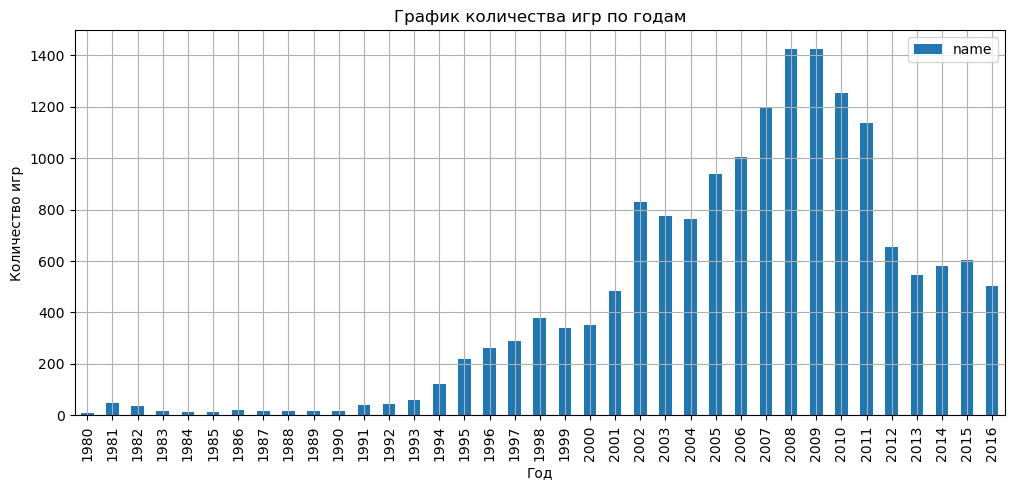

In [23]:
total_games_by_year = data.pivot_table(
    index='year_of_release', values='name', aggfunc='count')
total_games_by_year.plot(kind='bar', figsize=(12,5), grid=True)
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title('График количества игр по годам')
plt.show()

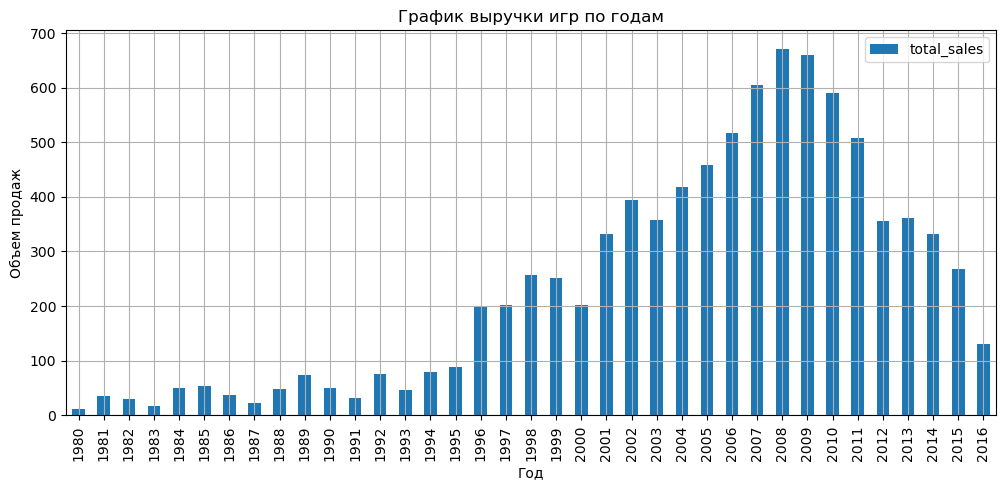

In [24]:
total_sales_by_year = data.pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum')
total_sales_by_year.plot(kind='bar', figsize=(12,5), grid=True)
plt.xlabel('Год')
plt.ylabel('Объем продаж')
plt.title('График выручки игр по годам')
plt.show()

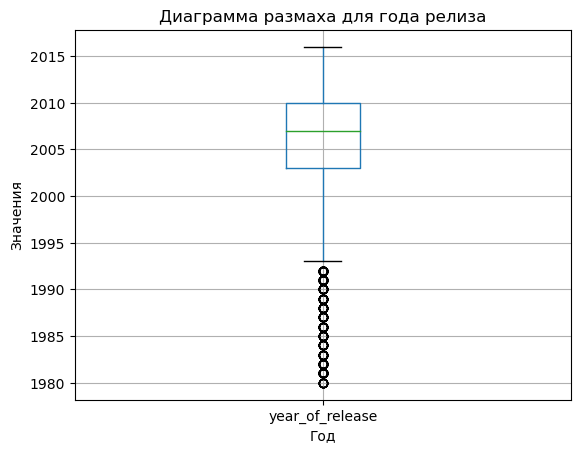

In [25]:
data.boxplot(column='year_of_release').set_title('Диаграмма размаха для года релиза')
plt.xlabel('Год')
plt.ylabel('Значения')
plt.show()

За первые 15 лет (период с 1980 по 1995) выпускалось значительно меньшее число игр, чем после.

Уберем из рассмотрения продажи до 1994 года.

In [26]:
good_data = data.query('year_of_release >= 1994')
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16079 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16079 non-null  object 
 1   platform         16079 non-null  object 
 2   year_of_release  16079 non-null  int64  
 3   genre            16079 non-null  object 
 4   na_sales         16079 non-null  float64
 5   eu_sales         16079 non-null  float64
 6   jp_sales         16079 non-null  float64
 7   other_sales      16079 non-null  float64
 8   critic_score     16079 non-null  float64
 9   user_score       16079 non-null  float64
 10  rating           16079 non-null  object 
 11  total_sales      16079 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Смотрю продажи по платформам

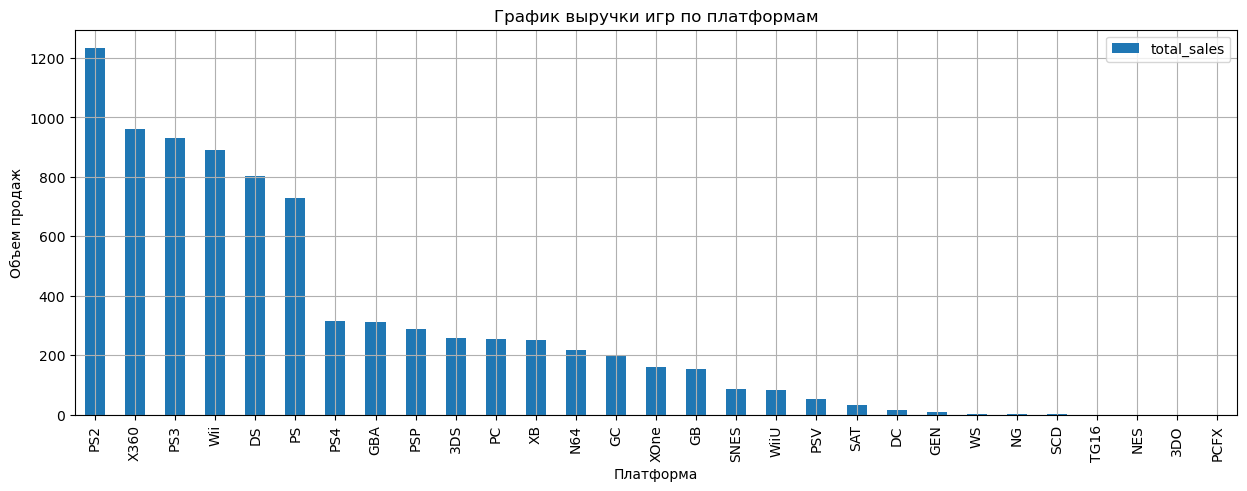

In [27]:
sales_by_platform = (
    good_data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False))
sales_by_platform.plot(kind='bar', grid=True, figsize=(15,5))
plt.xlabel('Платформа')
plt.ylabel('Объем продаж')
plt.title('График выручки игр по платформам')
plt.show()

Топ-10 платформ с наибольшими суммарными продажами за период с 1995 по 2016 гг.: PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS 

### Рассмотрим распределение продаж игр среди топ-10 платформ.

In [28]:
top_platform_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

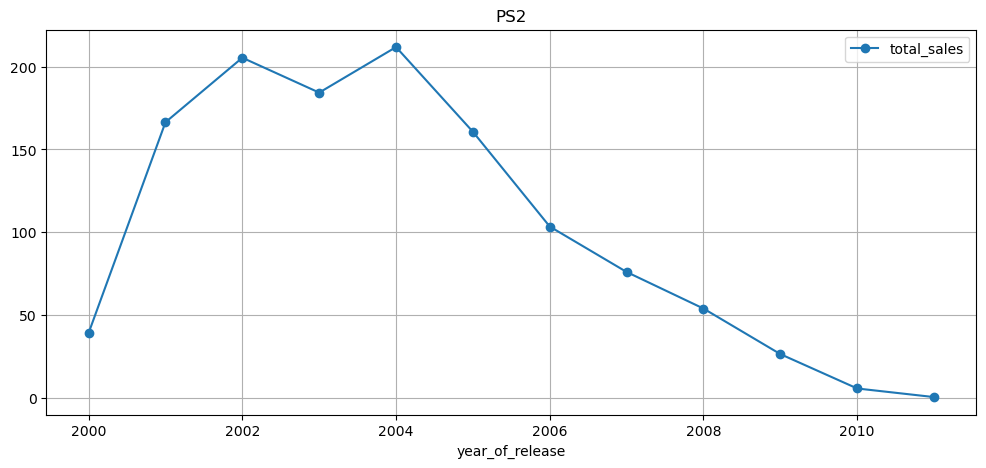

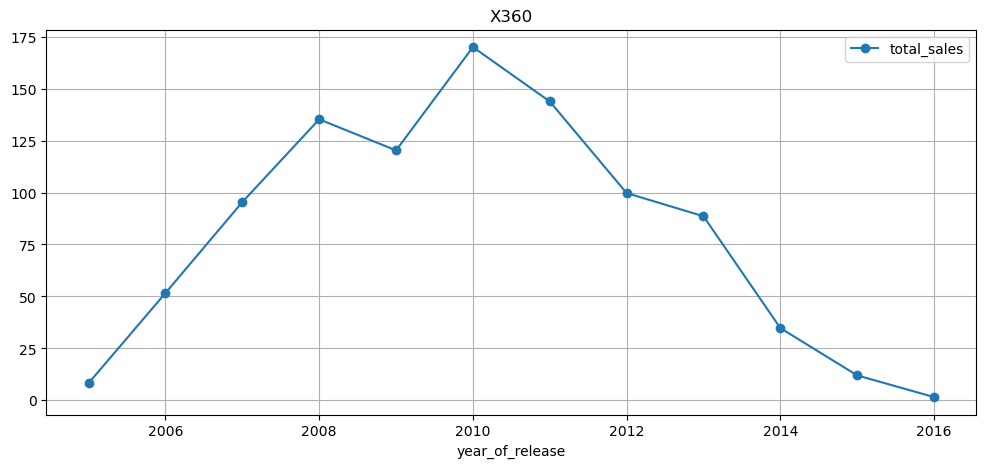

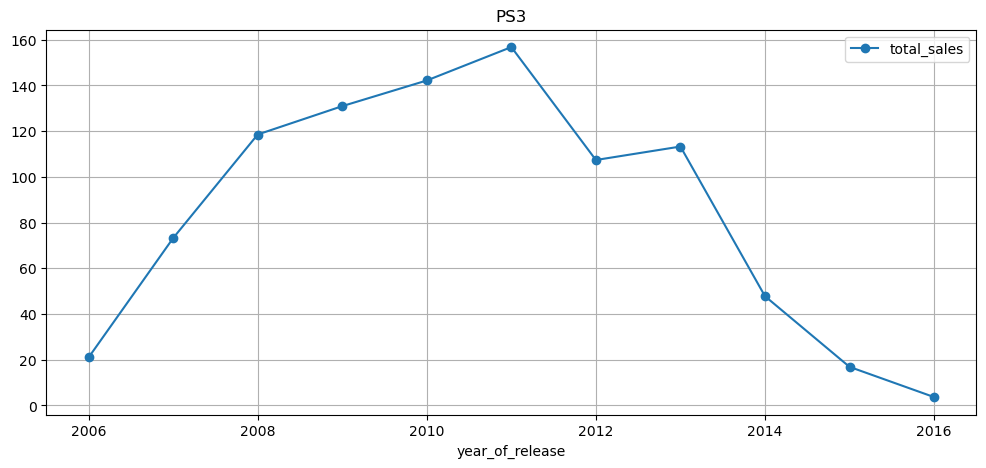

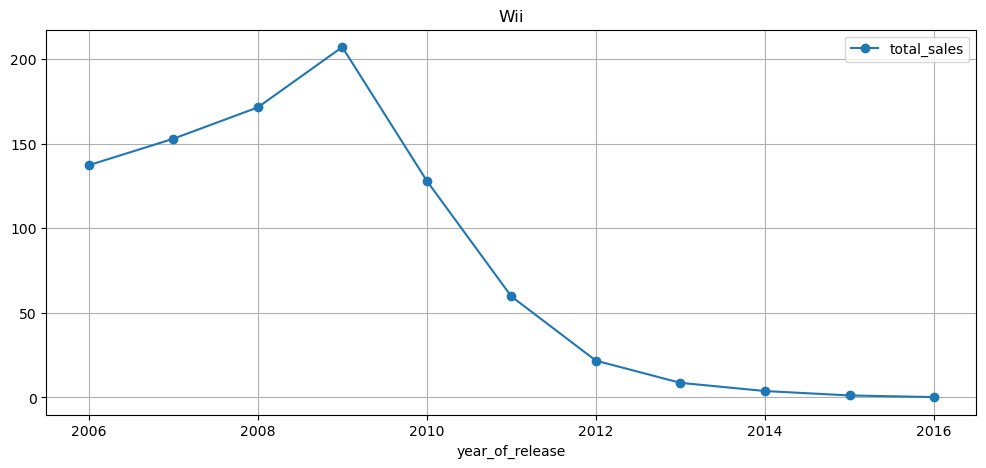

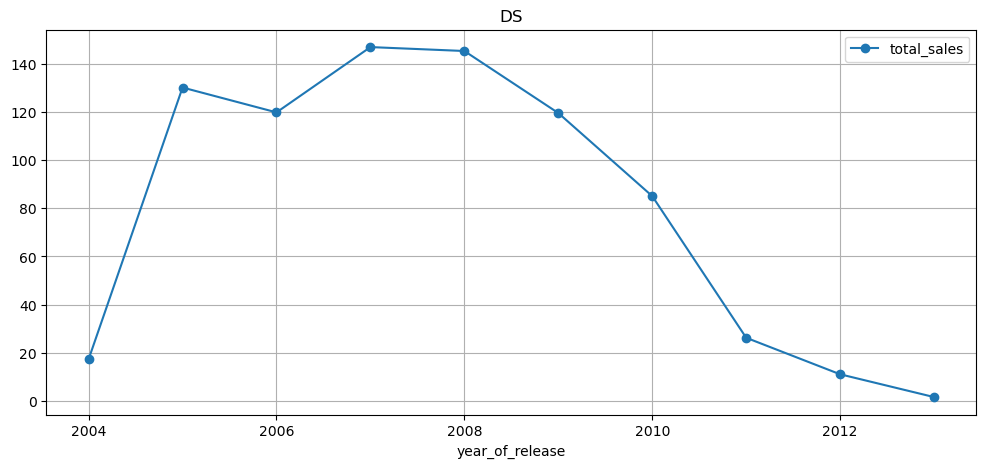

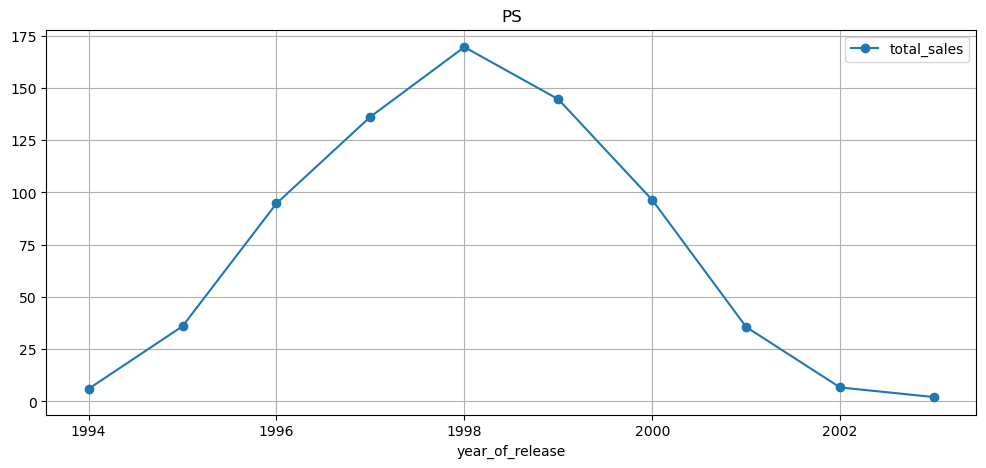

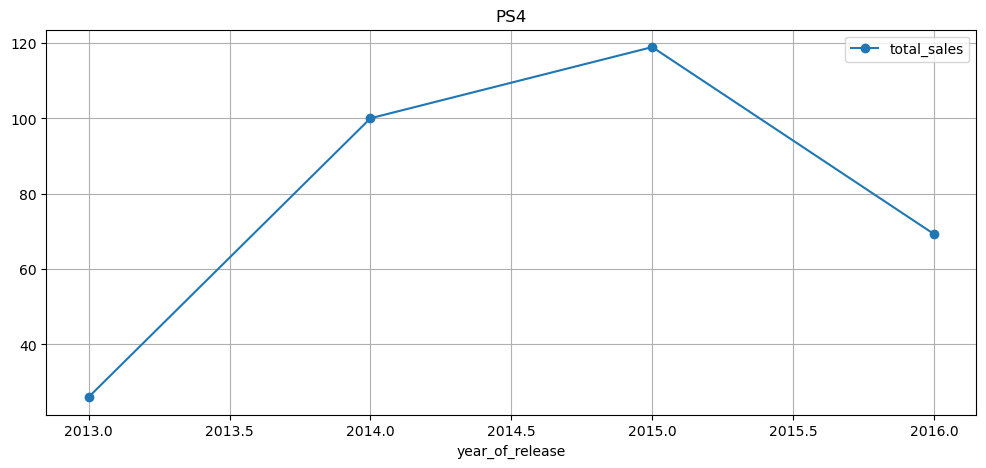

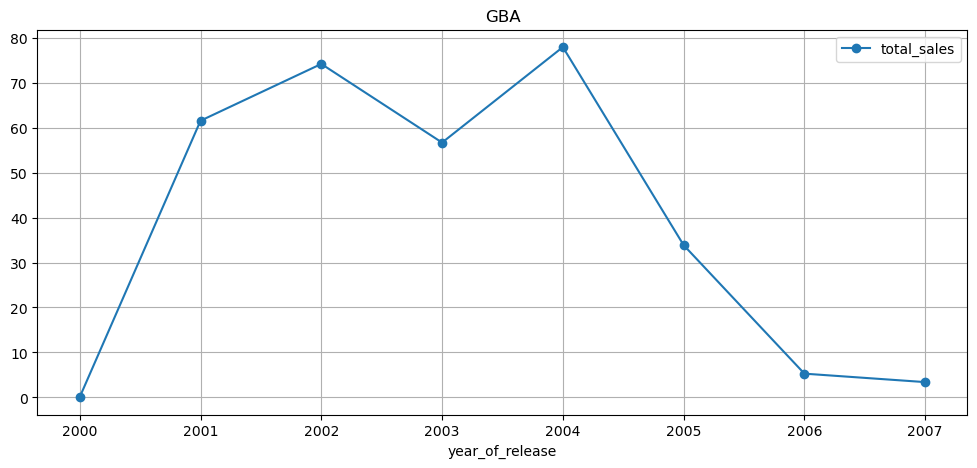

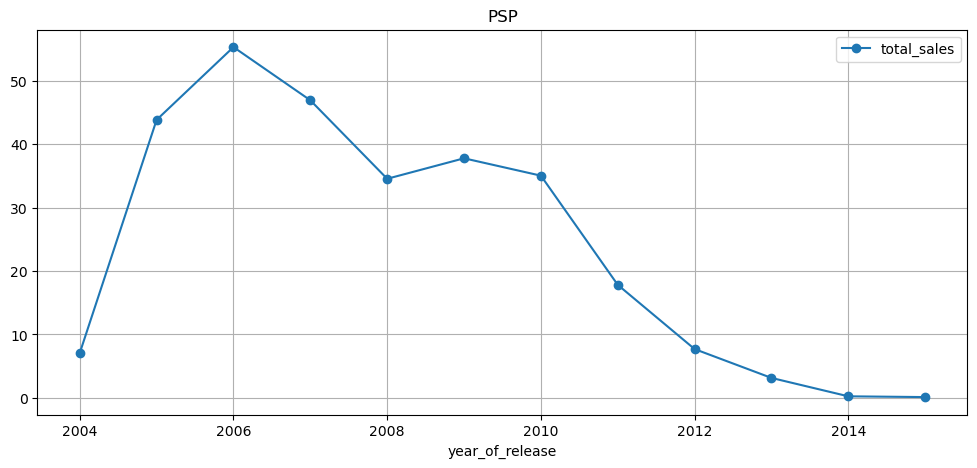

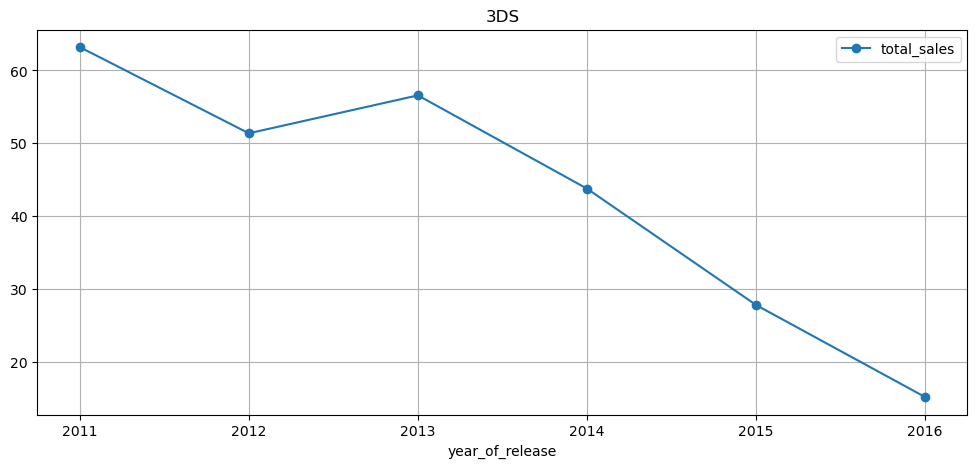

In [29]:
for platform in top_platform_list:
    total_sales_platform = good_data.loc[good_data['platform'] == platform]
    (total_sales_platform
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(style='o-', grid=True, figsize=(12,5))).set_title(platform)
    

- Для PS2: Активный срок жизни платформы 12 лет. Пик пришелся на 5ый год, после этого ежегодный спад.
- Для X360: Активный период платформы 12 лет. Пик пришелся на 6ой год. После этого ежегодный спад.
- Для PS3: Активный период платформы 12 лет. Пик на 7ой год. Затем резкие спады.
- Для Wii: Активный период платформы 11 лет. Активный рост на старте, с пиком на 4ый год. Затем резкий спад.
- Для DS: Активный период платформы 10 лет. Пик на 4ый год.
- Для PS: Активный период 10 лет. Плавный рост с пиком на 5ый год и затем ежегодное снижение.
- Для PS4: Платформа еще актуальна, всего 4 года наблюдений.
- Для GBA: 8 лет активный период, пик на 5ый год. Затем резкий спад.
- Для PSP: Активный период 12 лет, резкий рост с пиком на 3ий год, затем последовательное снижение.
- Для 3DS: Активный период платформы продолажется. В последние годы продажи планомерно снижаются.


**Итого средний срок "жизни" платформы 10-12 лет.**

### Отберу данные за актуальный период для построения прогноза на 2017 год

Рассмотрим данные о продажах, начиная с 2013 года. (3 полных года + имеющиеся данные за 2016 год)

In [30]:
active_platforms_data = good_data.query('year_of_release >= 2013')
active_platforms_data_by_year = (active_platforms_data
                                .pivot_table(index='year_of_release', columns='platform', 
                                                values='total_sales', aggfunc='sum')
                                .fillna(0))
                                    
active_platforms_data_by_year

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


Таким образом видим, что актуальность сохраняют 3DS, PC, PS3, PS4, PSV, Wii, WiiU, X360, XOne.

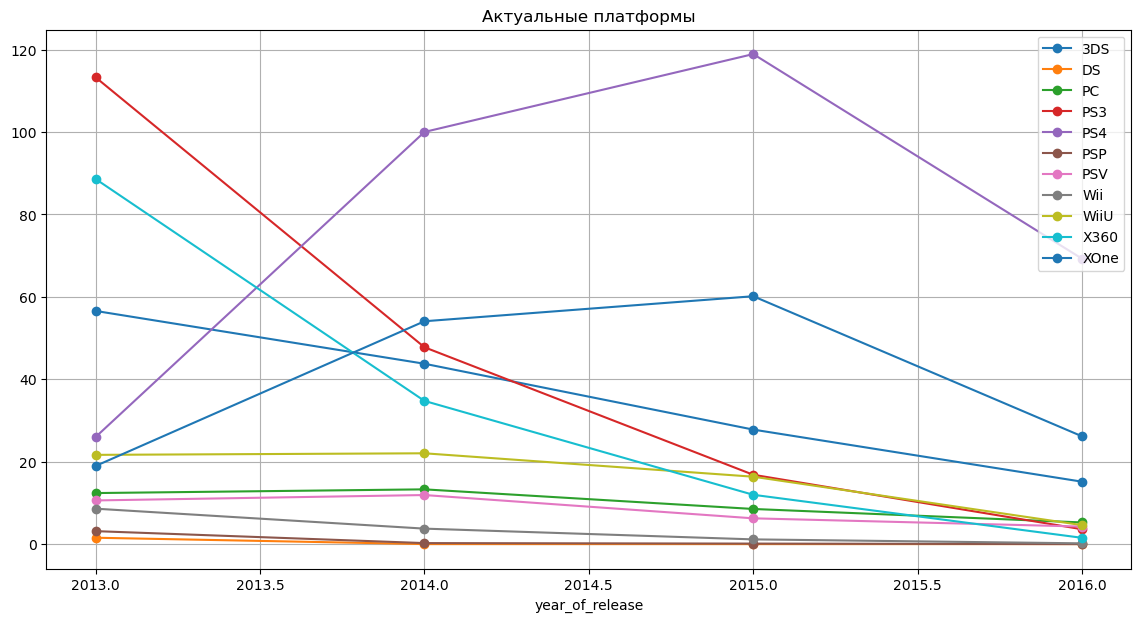

In [31]:
active_platforms_data_by_year.plot(style='o-', grid=True, figsize=(14, 7), title='Актуальные платформы')
plt.legend(loc='upper right')
plt.show()

Вижу, что показатели у всех актуальных платформ в 2016 году значительно ниже, чем в 2015 году. Это подтверждает, что в датасете нет всех актуальных данных за 2016 год.
В лидерах по продажам: PS4. На 2ом месте с большим отставанием XOne.
В целом можно сказать, что рост показывают PS4 и XOne, которые являются наиболее актуальными. Wii, PS3, X360, 3DS, PC падают по продажам. Относительные новые WiiU и PSV также показывают снижение.

### Строю боксплот по глобальным продажам игр в разбивке по платформам

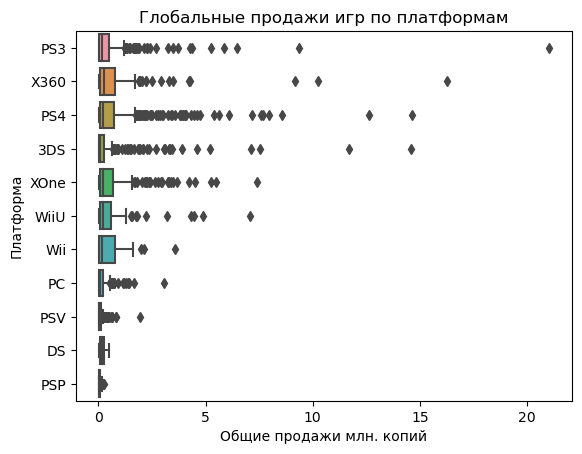

In [32]:
platform_boxplot1 = sns.boxplot(x='total_sales', 
                                y='platform', 
                                data=active_platforms_data)
                               
platform_boxplot1.set_title('Глобальные продажи игр по платформам')                             
platform_boxplot1.set_xlabel('Общие продажи млн. копий')
platform_boxplot1.set_ylabel('Платформа')
plt.show()

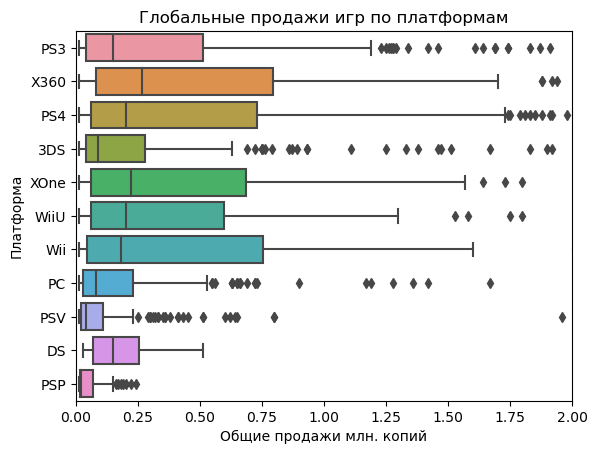

In [33]:
platform_boxplot2 = sns.boxplot(x='total_sales', 
                                y='platform', 
                                data=active_platforms_data)
                               
platform_boxplot2.set_xlim([0, 2])
platform_boxplot2.set_title('Глобальные продажи игр по платформам')                             
platform_boxplot2.set_xlabel('Общие продажи млн. копий')
platform_boxplot2.set_ylabel('Платформа')
plt.show()

Сфокусируемся на медианных продажах.

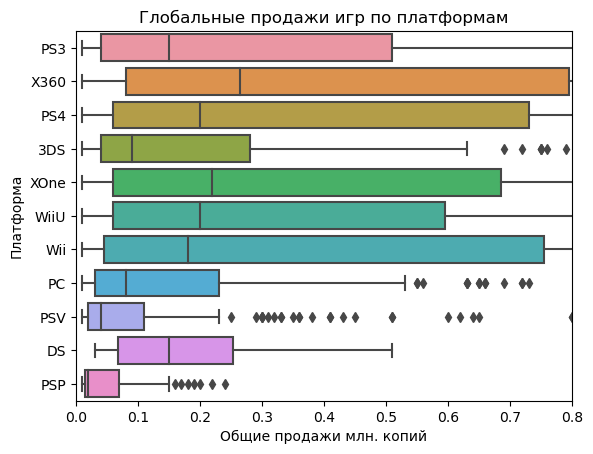

In [34]:
platform_boxplot3 = sns.boxplot(x='total_sales', 
                                y='platform', 
                                data=active_platforms_data)
                               
platform_boxplot3.set_xlim([0, 0.8])
platform_boxplot3.set_title('Глобальные продажи игр по платформам')                             
platform_boxplot3.set_xlabel('Общие продажи млн. копий')
platform_boxplot3.set_ylabel('Платформа')
plt.show()

Видим, что у PS3 есть сильный выброс по продажам (более 20 млн.). В целом продажи свыше 1.75 млн уже считаются выбросами. При детальном рассмотрении видим, что медиана продаж у X360 выше, чем у конкурента PS3, а медиана продаж у XOne выше, чем у PS4. 

### Рассмотрю, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построю диаграмму рассеяния и посчитаю корреляцию между отзывами и продажами

Рассмотрим данные по PS3.

In [35]:
ps3_data_critic_score = active_platforms_data.loc[(active_platforms_data['platform'] == 'PS3') 
                                               & (active_platforms_data['critic_score'] < 101)] 
ps3_data_user_score = active_platforms_data.loc[(active_platforms_data['platform'] == 'PS3') 
                                               & (active_platforms_data['user_score'] < 11)]

In [36]:
print('Коэффициент корреляции оценок критиков и продаж PS3:', 
      ps3_data_critic_score['total_sales'].corr(ps3_data_critic_score['critic_score']))

Коэффициент корреляции оценок критиков и продаж PS3: 0.33428533933719196


In [37]:
print('Коэффициент корреляции оценок пользователей и продаж PS3:', 
      ps3_data_user_score['total_sales'].corr(ps3_data_user_score['user_score']))

Коэффициент корреляции оценок пользователей и продаж PS3: 0.002394402735756673


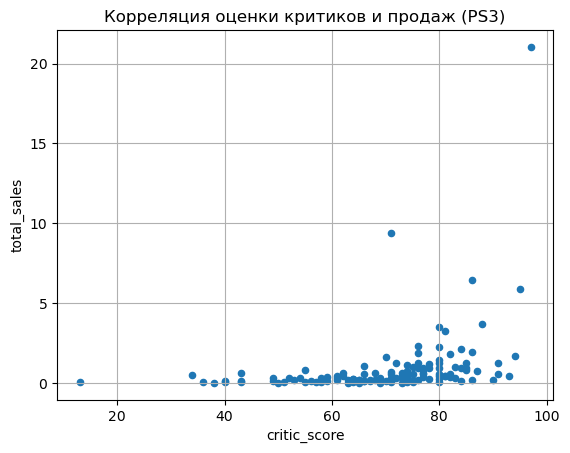

In [38]:
ps3_data_critic_score_total_sales = pd.DataFrame(data=ps3_data_critic_score, 
                                                 columns=['critic_score', 'total_sales'])
ps3_data_critic_score_total_sales.plot(x='critic_score', 
                                       y='total_sales', 
                                       kind='scatter',
                                       grid=True,
                                      title = 'Корреляция оценки критиков и продаж (PS3)')
plt.show()

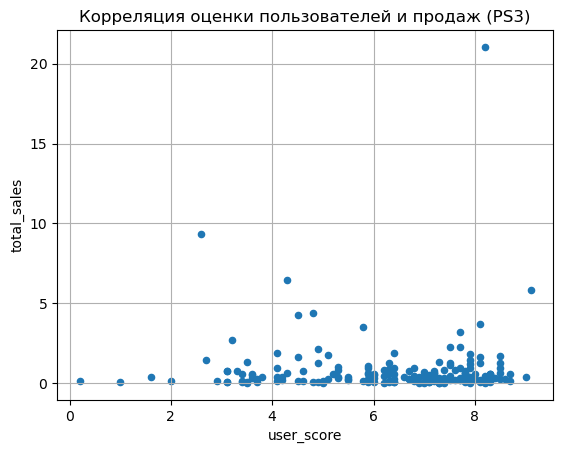

In [39]:
ps3_data_user_score_total_sales = pd.DataFrame(data=ps3_data_user_score, 
                                               columns=['user_score', 'total_sales'])
ps3_data_user_score_total_sales.plot(x='user_score', 
                                       y='total_sales', 
                                       kind='scatter',
                                     grid=True,
                                      title = 'Корреляция оценки пользователей и продаж (PS3)')
plt.show()

Существует слабая положительная корреляция между оценкой критиков и объемами продаж игр, а корреляция между оценками пользователей и продажами отсутствует.

### Соотношу выводы с продажами игр на других платформах

In [40]:
ps4_data_critic_score = active_platforms_data.loc[(active_platforms_data['platform'] == 'PS4') 
                                               & (active_platforms_data['critic_score'] < 101)] 
ps4_data_user_score = active_platforms_data.loc[(active_platforms_data['platform'] == 'PS4') 
                                               & (active_platforms_data['user_score'] < 11)] 

In [41]:
print('Коэффициент корреляции оценок критиков и продаж PS4:',
      ps4_data_critic_score['total_sales'].corr(ps4_data_critic_score['critic_score']))

Коэффициент корреляции оценок критиков и продаж PS4: 0.40656790206178145


In [42]:
print('Коэффициент корреляции оценок пользователей и продаж PS4:',
      ps4_data_user_score['total_sales'].corr(ps4_data_user_score['user_score']))

Коэффициент корреляции оценок пользователей и продаж PS4: -0.031957110204556466


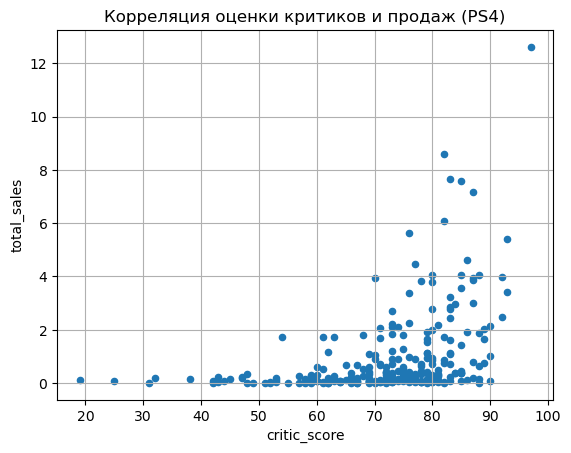

In [43]:
ps4_data_critic_score_total_sales = pd.DataFrame(data=ps4_data_critic_score, columns=['critic_score', 'total_sales'])
ps4_data_critic_score_total_sales.plot(x='critic_score', 
                                       y='total_sales', 
                                       kind='scatter',
                                       grid=True,
                                      title = 'Корреляция оценки критиков и продаж (PS4)')
plt.show()

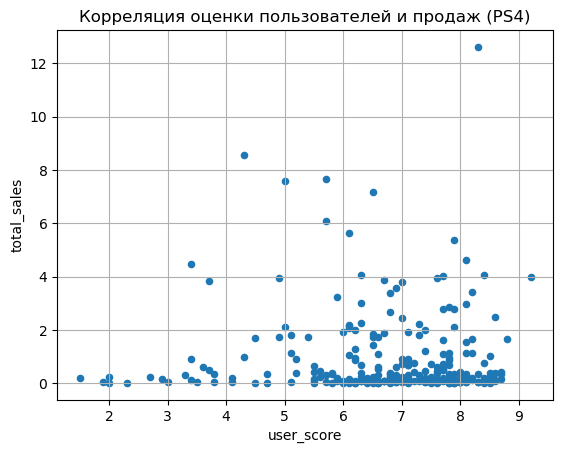

In [44]:
ps4_data_user_score_total_sales = pd.DataFrame(data=ps4_data_user_score, columns=['user_score', 'total_sales'])
ps4_data_user_score_total_sales.plot(x='user_score', 
                                       y='total_sales', 
                                       kind='scatter',
                                     grid=True,
                                      title = 'Корреляция оценки пользователей и продаж (PS4)')
plt.show()

На примере платформы PS4 также видим отсутствие корреляции между пользовательскими оценками и продажами. При этом также появляется слабая положительная корреляция между оценками критиков и продажами.

In [45]:
х360_data_critic_score = active_platforms_data.loc[(active_platforms_data['platform'] == 'X360') 
                                               & (active_platforms_data['critic_score'] < 101)] 
x360_data_user_score = active_platforms_data.loc[(active_platforms_data['platform'] == 'X360') 
                                               & (active_platforms_data['user_score'] < 11)] 

In [46]:
print('Коэффициент корреляции оценок критиков и продаж X360:'
      ,х360_data_critic_score['total_sales'].corr(х360_data_critic_score['critic_score']))

Коэффициент корреляции оценок критиков и продаж X360: 0.3503445460228666


In [47]:
print('Коэффициент корреляции оценок пользователей и продаж X360:',
      x360_data_user_score['total_sales'].corr(x360_data_user_score['user_score']))

Коэффициент корреляции оценок пользователей и продаж X360: -0.011742185147181363


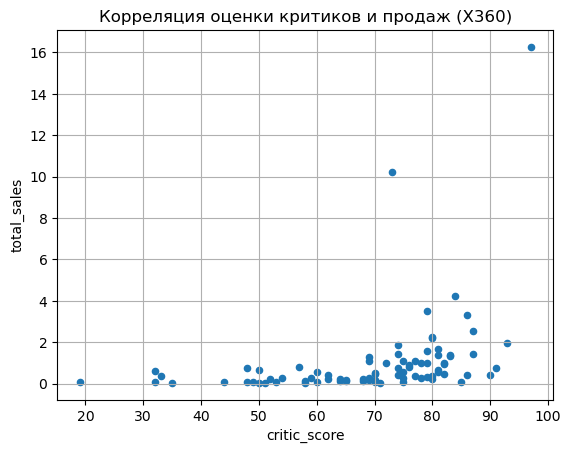

In [48]:
x360_data_critic_score_total_sales = pd.DataFrame(data=х360_data_critic_score, 
                                                  columns=['critic_score', 'total_sales'])
x360_data_critic_score_total_sales.plot(x='critic_score', 
                                       y='total_sales', 
                                       kind='scatter',
                                        grid=True,
                                      title = 'Корреляция оценки критиков и продаж (X360)')
plt.show()

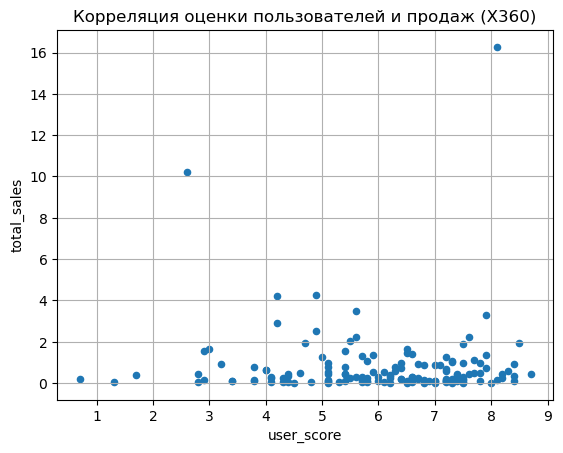

In [49]:
x360_data_user_score_total_sales = pd.DataFrame(data=x360_data_user_score, columns=['user_score', 'total_sales'])
x360_data_user_score_total_sales.plot(x='user_score', 
                                       y='total_sales', 
                                       kind='scatter',
                                      grid=True,
                                      title = 'Корреляция оценки пользователей и продаж (X360)')
plt.show()

По данной платформе также существует незначительная положительная корреляция между оценкой критиков и объемами продаж игр. При этом корреляция между оценками и пользователями и объемами продаж отсутствует.

In [50]:
xone_data_critic_score = active_platforms_data.loc[(active_platforms_data['platform'] == 'XOne') 
                                               & (active_platforms_data['critic_score'] < 101)] 
xone_data_user_score = active_platforms_data.loc[(active_platforms_data['platform'] == 'XOne') 
                                               & (active_platforms_data['user_score'] < 11)] 

In [51]:
print('Коэффициент корреляции оценок критиков и продаж XOne:',
      xone_data_critic_score['critic_score'].corr(xone_data_critic_score['total_sales']))

Коэффициент корреляции оценок критиков и продаж XOne: 0.4169983280084016


In [52]:
print('Коэффициент корреляции оценок пользователей и продаж X360:',
      xone_data_user_score['user_score'].corr(xone_data_user_score['total_sales']))

Коэффициент корреляции оценок пользователей и продаж X360: -0.06892505328279419


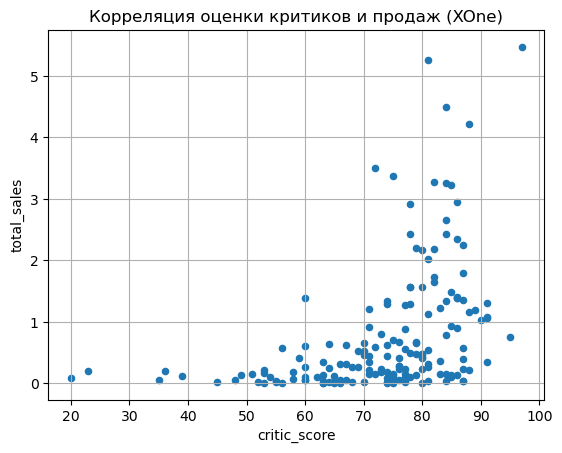

In [53]:
xone_data_critic_score_total_sales = pd.DataFrame(data=xone_data_critic_score, 
                                                  columns=['critic_score', 'total_sales'])
xone_data_critic_score_total_sales.plot(x='critic_score', 
                                       y='total_sales', 
                                       kind='scatter',
                                        grid=True,
                                      title = 'Корреляция оценки критиков и продаж (XOne)')
plt.show()

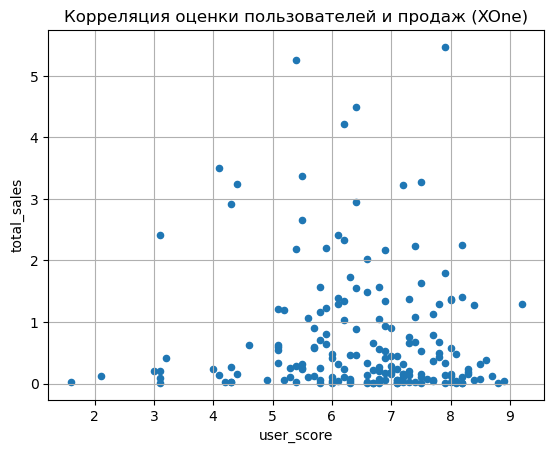

In [54]:
xone_data_user_score_total_sales = pd.DataFrame(data=xone_data_user_score, columns=['user_score', 'total_sales'])
xone_data_user_score_total_sales.plot(x='user_score', 
                                       y='total_sales', 
                                       kind='scatter',
                                      grid=True,
                                      title = 'Корреляция оценки пользователей и продаж (XOne)')
plt.show()

На данной платформе также отсутствует взаимосвязь между оценками пользователей и продажами. Корреляция между оценками критиков и общими продажами также слабо-положительная как и других платформ.

### Рассмотрю общее распределение игр по жанрам. Выделю самые прибыльные жанры. Выделю жанры с высокими и низкими продажами

Рассмотрю популярные жанры с точки зрения количества.

In [55]:
active_platforms_data['genre'].value_counts()

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

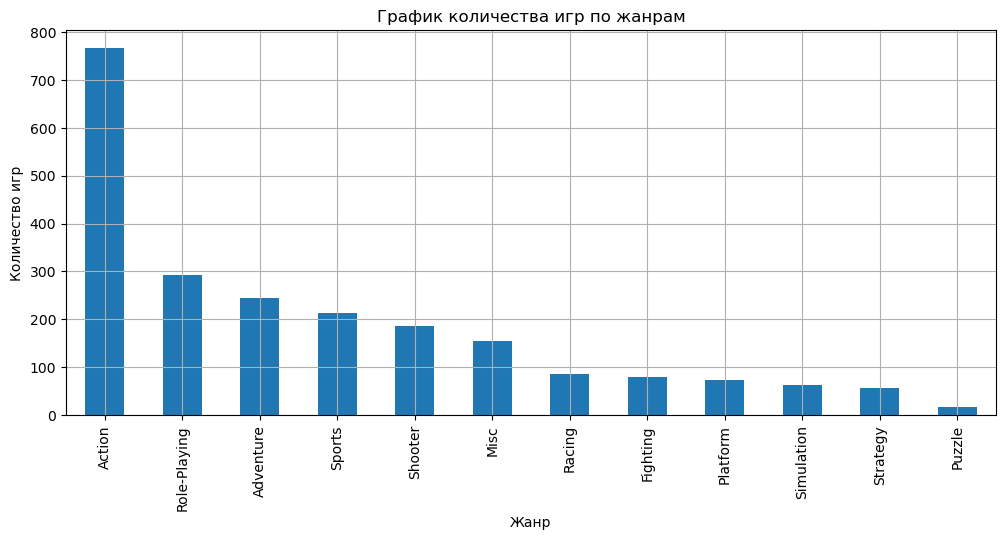

In [56]:
active_platforms_data['genre'].value_counts().plot(kind='bar', figsize=(12,5), grid=True)
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.title('График количества игр по жанрам')
plt.show()

Самые популярные жанры Action, Role-Playing, Adventure, Sports.

Рассмотрим продажи игр по жанрам (общее и медиану).

In [57]:
sales_by_genre = active_platforms_data.pivot_table(index='genre', 
                                                   values='total_sales', 
                                                   aggfunc=['sum','median'])
sales_by_genre.columns = ['sum', 'median']
sales_by_genre_sorted = sales_by_genre.sort_values(by='sum', ascending=False)
sales_by_genre_sorted

,sum,median
genre,,
Action,321.87,0.110
Shooter,232.98,0.450
Sports,150.65,0.240
Role-Playing,145.89,0.125
Misc,62.82,0.100
Platform,42.63,0.225
Racing,39.89,0.120
Fighting,35.31,0.125
Adventure,23.64,0.030


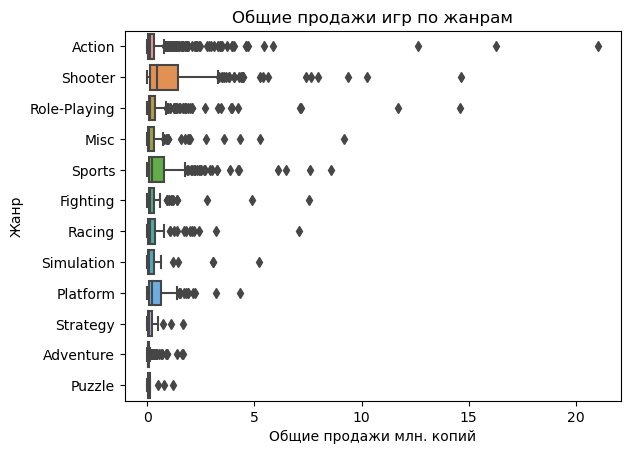

In [58]:
genre_boxplot1 = sns.boxplot(x='total_sales', 
                                y='genre', 
                                data=active_platforms_data)
genre_boxplot1.set_title('Общие продажи игр по жанрам')                             
genre_boxplot1.set_xlabel('Общие продажи млн. копий')
genre_boxplot1.set_ylabel('Жанр')
plt.show()

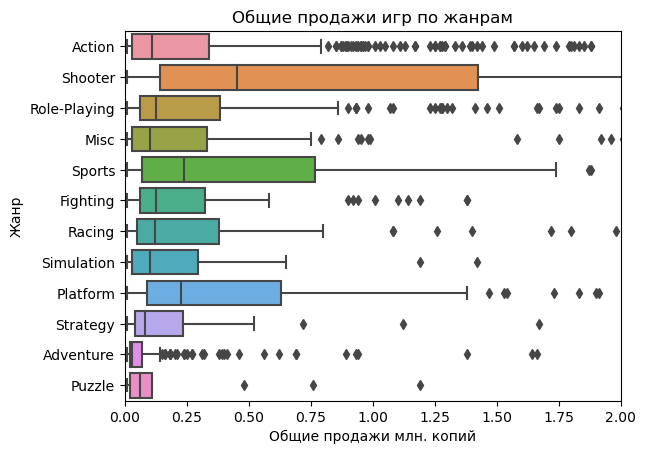

In [59]:
genre_boxplot2 = sns.boxplot(x='total_sales', 
                                y='genre', 
                                data=active_platforms_data)
genre_boxplot2.set_xlim([0, 2])
genre_boxplot2.set_title('Общие продажи игр по жанрам')                             
genre_boxplot2.set_xlabel('Общие продажи млн. копий')
genre_boxplot2.set_ylabel('Жанр')
plt.show()

- Несмотря на большое количество игр в жанре Adventure, игры этого жанра продаются плохо и их медианные продажи самые низкие.
- Больше всего игр в жанре Action, и на этот жанр приходится больше всего продаж, но эта группа содержит сильные выбросы. Если мы рассмотрим медианные продажи, то увидим, что они ниже, чем у Shooter, Sports, Platform.
- Жанры Strategy и Puzzle имеют как низкие общие, так и медианные продажи.
- В жанре Role-Playing существует большое количество игр, но их медианные продажи на уровне гораздо менее популярного жанра Fighting, вероятно это объясняется региональной спецификой.

### Вывод

В ходе исследовательского анализа данных было выявлено, что:
- Существенный рост выпускаемых игр начался с 1994 года;
- Средний срок актуальности платформы в среднем 10-12 лет;
- Пик продаж приходится часто на 5-6 год жизненного цикла платформы;
- Актуальный период для рассмотрения рынка видеоигр был выделен с 2013 по 2016 год;
- Наиболее перспективными платфорами являются PS4 и XOne, в следующем году они продолжат показывать рост;
- Медианные продажи для игр на XOne лучше, чем у PS4;
- Отзывы пользователей не влияют на продажи внутри платформы;
- Отзывы критиков имеют незначительную положительную корреляцию с продажами;
- Самый прибильный жанр игр - Shooter.

## Этап 4. Составляю портрет пользователя каждого региона

### Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишите различия в долях продаж

Рассмотрим продажи в NA регионе по каждой платформе и сравним с общими продажами.

In [60]:
na_platform = active_platforms_data.pivot_table(index='platform', 
                                                values=['na_sales','total_sales'], 
                                                aggfunc='sum')
na_platform_sorted = na_platform.sort_values(by='na_sales', ascending=False)
na_platform_sorted['share'] = (na_platform_sorted['na_sales'] / na_platform_sorted['total_sales'])
na_platform_sorted

,na_sales,total_sales,share
platform,,,
PS4,108.74,314.14,0.346151
XOne,93.12,159.32,0.584484
X360,81.66,136.80,0.596930
PS3,63.50,181.43,0.349997
3DS,38.20,143.25,0.266667
WiiU,29.21,64.63,0.451957
PC,11.11,39.43,0.281765
Wii,6.56,13.66,0.480234
PSV,5.04,32.99,0.152774


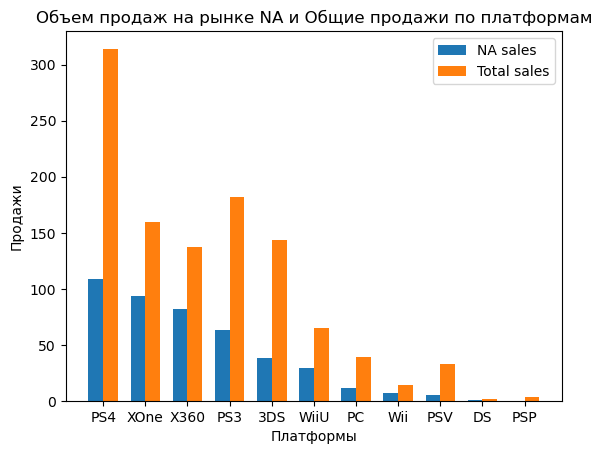

In [61]:
bar_width = 0.35
indices = range(len(na_platform_sorted.index))
plt.bar(indices, na_platform_sorted['na_sales'], width=bar_width, label='NA sales')
plt.bar([i + bar_width for i in indices], na_platform_sorted['total_sales'], 
        width=bar_width, label='Total sales')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.title('Объем продаж на рынке NA и Общие продажи по платформам')
plt.legend()
plt.xticks([i + bar_width / 2 for i in indices], na_platform_sorted.index)
plt.show()

Рассмотрим продажи в EU регионе.

In [62]:
eu_platform = active_platforms_data.pivot_table(index='platform', 
                                                values=['eu_sales', 'total_sales'], 
                                                aggfunc='sum')
eu_platform_sorted = eu_platform.sort_values(by='eu_sales', ascending=False)
eu_platform_sorted['share'] = eu_platform_sorted['eu_sales'] / eu_platform_sorted['total_sales']
eu_platform_sorted

,eu_sales,total_sales,share
platform,,,
PS4,141.09,314.14,0.449131
PS3,67.81,181.43,0.373753
XOne,51.59,159.32,0.323814
X360,42.52,136.80,0.310819
3DS,30.96,143.25,0.216126
PC,25.36,39.43,0.643165
WiiU,19.85,64.63,0.307133
PSV,6.10,32.99,0.184905
Wii,5.93,13.66,0.434114


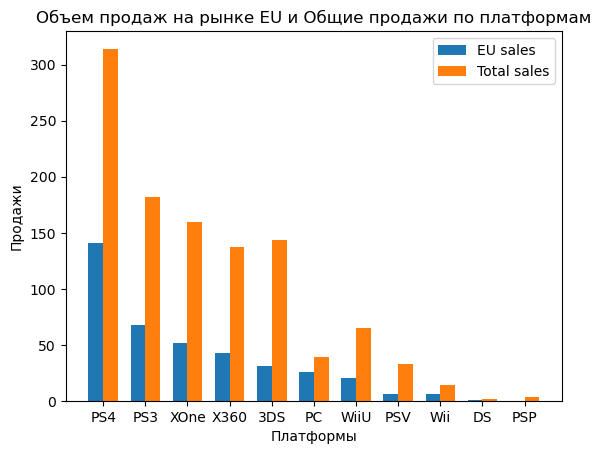

In [63]:
bar_width = 0.35
indices = range(len(eu_platform_sorted.index))
plt.bar(indices, eu_platform_sorted['eu_sales'], width=bar_width, label='EU sales')
plt.bar([i + bar_width for i in indices], eu_platform_sorted['total_sales'], 
        width=bar_width, label='Total sales')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.title('Объем продаж на рынке EU и Общие продажи по платформам')
plt.legend()
plt.xticks([i + bar_width / 2 for i in indices], eu_platform_sorted.index)
plt.show()

Рассмотрим продажи в JP регионе.

In [64]:
jp_platform = active_platforms_data.pivot_table(index='platform', 
                                                values=['jp_sales', 'total_sales'], 
                                                aggfunc='sum')
jp_platform_sorted = jp_platform.sort_values(by='jp_sales', ascending=False)
jp_platform_sorted['share'] = jp_platform_sorted['jp_sales'] / jp_platform_sorted['total_sales']
jp_platform_sorted

,jp_sales,total_sales,share
platform,,,
3DS,67.81,143.25,0.473368
PS3,23.35,181.43,0.128700
PSV,18.59,32.99,0.563504
PS4,15.96,314.14,0.050805
WiiU,10.88,64.63,0.168343
PSP,3.29,3.50,0.940000
X360,0.51,136.80,0.003728
XOne,0.34,159.32,0.002134
Wii,0.05,13.66,0.003660


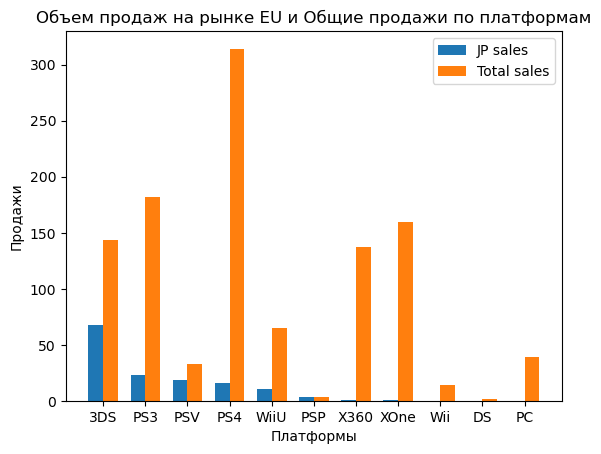

In [65]:
bar_width = 0.35
indices = range(len(jp_platform_sorted.index))
plt.bar(indices, jp_platform_sorted['jp_sales'], width=bar_width, label='JP sales')
plt.bar([i + bar_width for i in indices], jp_platform_sorted['total_sales'], 
        width=bar_width, label='Total sales')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.title('Объем продаж на рынке EU и Общие продажи по платформам')
plt.legend()
plt.xticks([i + bar_width / 2 for i in indices], jp_platform_sorted.index)
plt.show()

/var/folders/86/_g8k2m7573ddjv9tyf1l7gpm0000gn/T/ipykernel_91215/1708532471.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i = df_i.append({'platform': 'Other platform', platforms_name[i]:
/var/folders/86/_g8k2m7573ddjv9tyf1l7gpm0000gn/T/ipykernel_91215/1708532471.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i = df_i.append({'platform': 'Other platform', platforms_name[i]:
/var/folders/86/_g8k2m7573ddjv9tyf1l7gpm0000gn/T/ipykernel_91215/1708532471.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i = df_i.append({'platform': 'Other platform', platforms_name[i]:


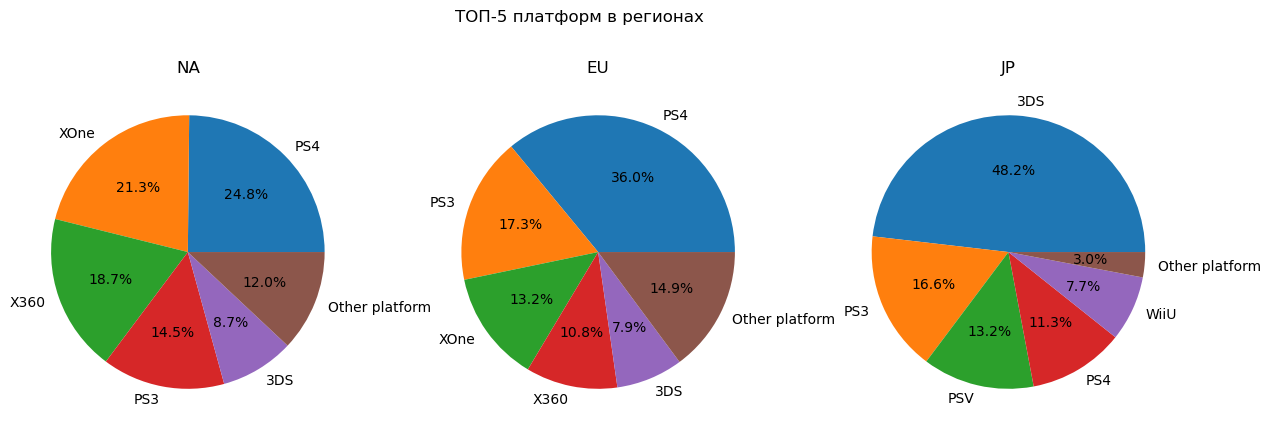

In [66]:
games_fresh = active_platforms_data.copy()
platforms_name = games_fresh.columns[4:7]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  df_i = (games_fresh.groupby('platform')[platforms_name[i]].sum().
             reset_index().
             sort_values(platforms_name[i], ascending = False, ignore_index = True).
             head(5))
  df_i = df_i.append({'platform': 'Other platform', platforms_name[i]: 
                      games_fresh[platforms_name[i]].sum() - df_i[platforms_name[i]].sum()}, 
                     ignore_index=True)
  axs[i].pie(df_i[platforms_name[i]], labels = df_i['platform'], autopct='%1.1f%%')
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

Различия в предпочтениях платформ за актуальный период сильно отличаются для каждого региона. 
- В NA лучшие результаты у PS4 (24.8%), XOne отстает незначительно (21.3%). При этом данный рынок составляет 34% глобального рынка по PS4 и 58% от глобального рынка XOne.
- В EU доминирует PS4 (36%), на втором месте PS3 (17.3%), на третьем - XOne (13.2%). Этот рынок наибольшую долю продаж по PS4 относительно глобального рынка (44%).
- В JP продажи отличаются сильнее всего. Самыми коммерческими успешными тут является 3DS (48.2%). Затем 16.6% у неактуальной PS3 и 13.2%. У PS4 - 11.3%, а XOne крайне не популярен (меньше 1%).

### Самые популярные жанры (топ-5)

In [67]:
na_genre = active_platforms_data.pivot_table(index='genre', 
                                             values=['na_sales','total_sales'], 
                                             aggfunc='sum')
na_genre_sorted = na_genre.sort_values(by='na_sales', ascending=False)
na_genre_sorted['share'] = (na_genre_sorted['na_sales'] / na_genre_sorted['total_sales'])
na_genre_sorted

,na_sales,total_sales,share
genre,,,
Action,126.05,321.87,0.391618
Shooter,109.74,232.98,0.471028
Sports,65.27,150.65,0.433256
Role-Playing,46.40,145.89,0.318048
Misc,27.49,62.82,0.437599
Platform,18.14,42.63,0.425522
Fighting,15.55,35.31,0.440385
Racing,12.96,39.89,0.324893
Adventure,7.14,23.64,0.302030


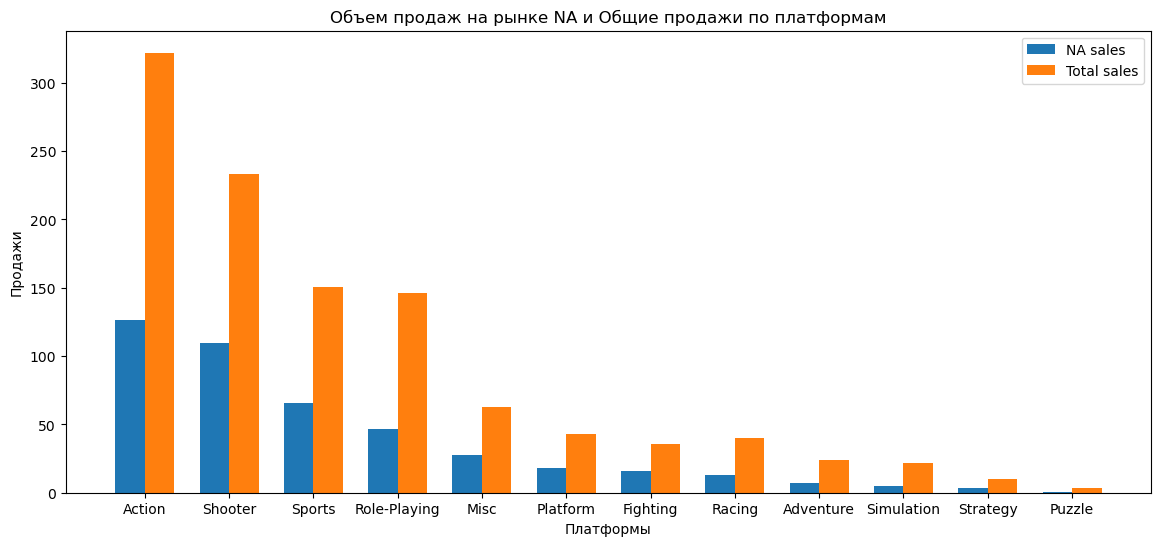

In [68]:
bar_width = 0.35
indices = range(len(na_genre_sorted.index))
plt.figure(figsize=(14, 6))
plt.bar(indices, na_genre_sorted['na_sales'], width=bar_width, label='NA sales')
plt.bar([i + bar_width for i in indices], na_genre_sorted['total_sales'], 
        width=bar_width, label='Total sales')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.title('Объем продаж на рынке NA и Общие продажи по платформам')
plt.legend()
plt.xticks([i + bar_width / 2 for i in indices], na_genre_sorted.index)
plt.show()

In [69]:
eu_genre = active_platforms_data.pivot_table(index='genre', 
                                             values=['eu_sales','total_sales'], 
                                             aggfunc='sum')
eu_genre_sorted = eu_genre.sort_values(by='eu_sales', ascending=False)
eu_genre_sorted['share'] = (eu_genre_sorted['eu_sales'] / eu_genre_sorted['total_sales'])
eu_genre_sorted

,eu_sales,total_sales,share
genre,,,
Action,118.13,321.87,0.367012
Shooter,87.86,232.98,0.377114
Sports,60.52,150.65,0.401726
Role-Playing,36.97,145.89,0.253410
Racing,20.19,39.89,0.506142
Misc,20.04,62.82,0.319007
Platform,15.58,42.63,0.365470
Simulation,10.92,21.76,0.501838
Fighting,8.55,35.31,0.242141


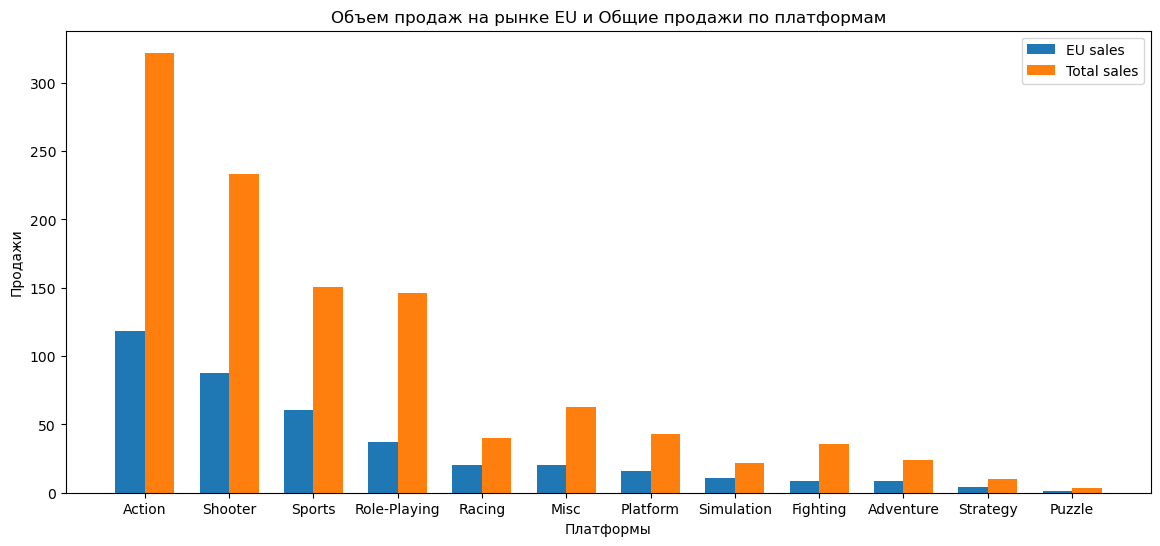

In [70]:
bar_width = 0.35
indices = range(len(eu_genre_sorted.index))
plt.figure(figsize=(14, 6))
plt.bar(indices, eu_genre_sorted['eu_sales'], width=bar_width, label='EU sales')
plt.bar([i + bar_width for i in indices], eu_genre_sorted['total_sales'], 
        width=bar_width, label='Total sales')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.title('Объем продаж на рынке EU и Общие продажи по платформам')
plt.legend()
plt.xticks([i + bar_width / 2 for i in indices], eu_genre_sorted.index)
plt.show()

In [71]:
jp_genre = active_platforms_data.pivot_table(index='genre', 
                                             values=['jp_sales','total_sales'], 
                                             aggfunc='sum')
jp_genre_sorted = jp_genre.sort_values(by='jp_sales', ascending=False)
jp_genre_sorted['share'] = (jp_genre_sorted['jp_sales'] / jp_genre_sorted['total_sales'])
jp_genre_sorted

,jp_sales,total_sales,share
genre,,,
Role-Playing,51.04,145.89,0.349853
Action,40.49,321.87,0.125796
Misc,9.20,62.82,0.146450
Fighting,7.65,35.31,0.216653
Shooter,6.61,232.98,0.028372
Adventure,5.82,23.64,0.246193
Sports,5.41,150.65,0.035911
Platform,4.79,42.63,0.112362
Simulation,4.52,21.76,0.207721


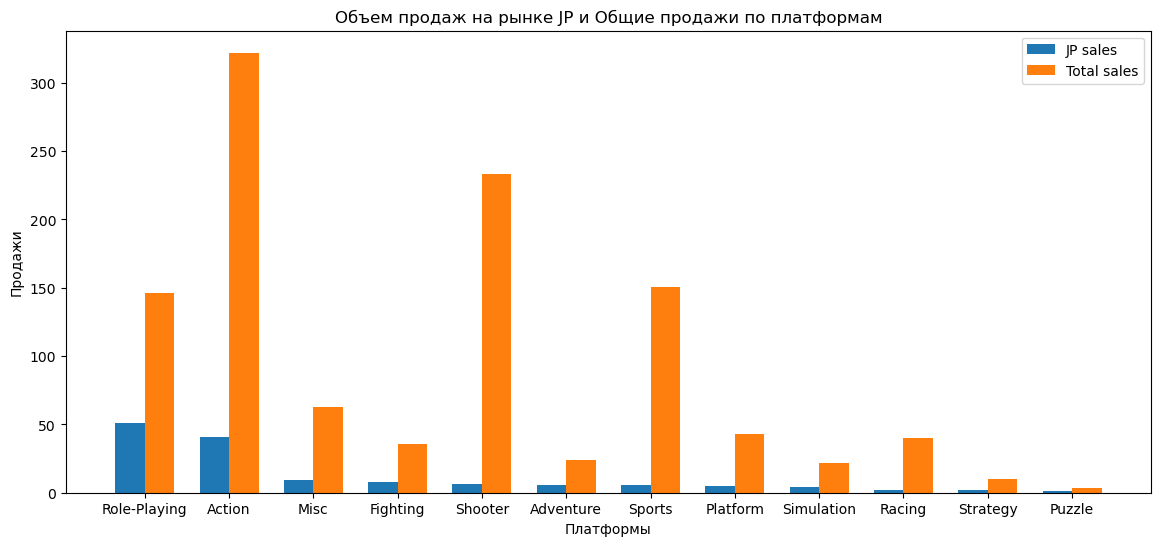

In [72]:
bar_width = 0.35
indices = range(len(jp_genre_sorted.index))
plt.figure(figsize=(14, 6))
plt.bar(indices, jp_genre_sorted['jp_sales'], width=bar_width, label='JP sales')
plt.bar([i + bar_width for i in indices], jp_genre_sorted['total_sales'], 
        width=bar_width, label='Total sales')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.title('Объем продаж на рынке JP и Общие продажи по платформам')
plt.legend()
plt.xticks([i + bar_width / 2 for i in indices], jp_genre_sorted.index)
plt.show()

/var/folders/86/_g8k2m7573ddjv9tyf1l7gpm0000gn/T/ipykernel_91215/3514610908.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i = df_i.append({'genre': 'Other genre', platforms_name[i]:
/var/folders/86/_g8k2m7573ddjv9tyf1l7gpm0000gn/T/ipykernel_91215/3514610908.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i = df_i.append({'genre': 'Other genre', platforms_name[i]:
/var/folders/86/_g8k2m7573ddjv9tyf1l7gpm0000gn/T/ipykernel_91215/3514610908.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i = df_i.append({'genre': 'Other genre', platforms_name[i]:


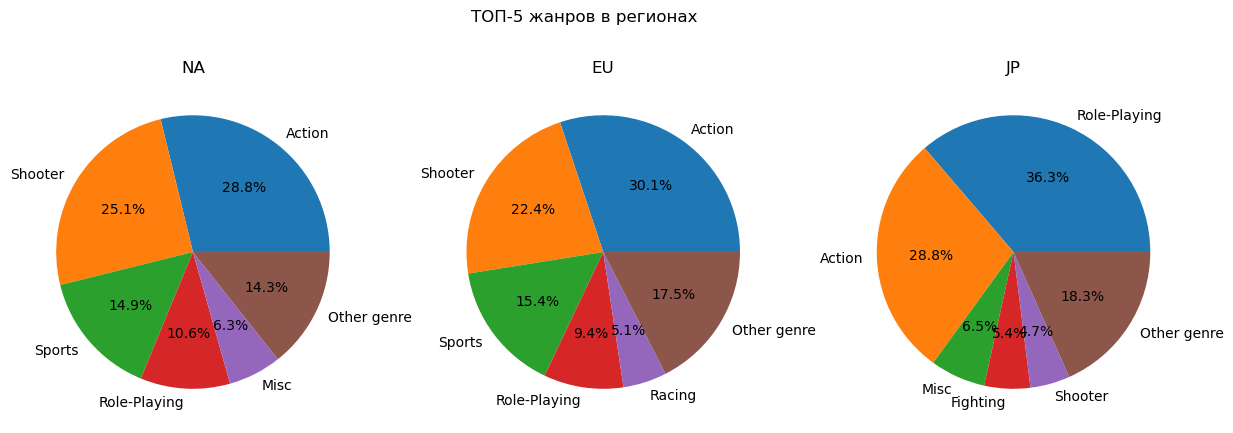

In [73]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  df_i = (games_fresh.groupby('genre')[platforms_name[i]].sum().
             reset_index().
             sort_values(platforms_name[i], ascending = False, ignore_index = True).
             head(5))
  df_i = df_i.append({'genre': 'Other genre', platforms_name[i]: 
                      games_fresh[platforms_name[i]].sum() - df_i[platforms_name[i]].sum()}, 
                     ignore_index=True)
  axs[i].pie(df_i[platforms_name[i]], labels = df_i['genre'], autopct='%1.1f%%')
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

- В NA топ-3 жанра по популярности: Action (28.8%), Shooter (25.1%), Sports (14%).
- В EU лидеры такие же как в NA, но Action имеет большую долю (30%), Shooter (22.4%), Sports (15.4%).
- В JP предпочтения отличаются сильнее всего. Самый популярный жанр - Role-playing (36.3%). За ним следуют Action (28.8%), Misc (6.5%). Популярный в NA и EU жанр Shooter на рынке JP имеет только 4.7%.

### Рассматриваю, влияет ли рейтинг ESRB на продажи в отдельном регионе

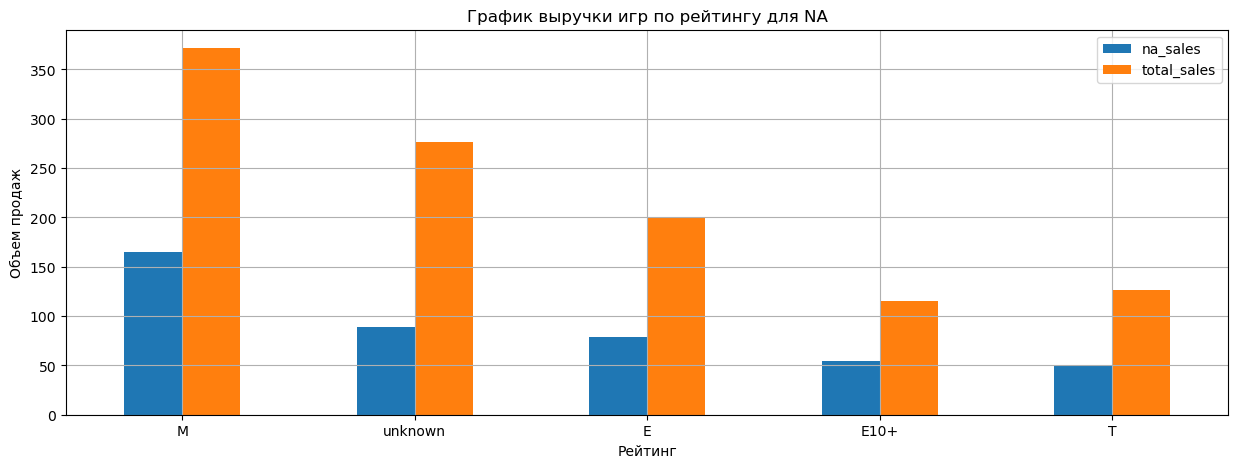

In [74]:
sales_by_rating_na = (
    active_platforms_data
    .pivot_table(index='rating', values=['na_sales', 'total_sales'], aggfunc='sum')
    .sort_values(by='na_sales', ascending=False))
sales_by_rating_na.plot(kind='bar', grid=True, figsize=(15,5))
plt.xlabel('Рейтинг')
plt.ylabel('Объем продаж')
plt.xticks(rotation=0)
plt.title('График выручки игр по рейтингу для NA')
plt.show()

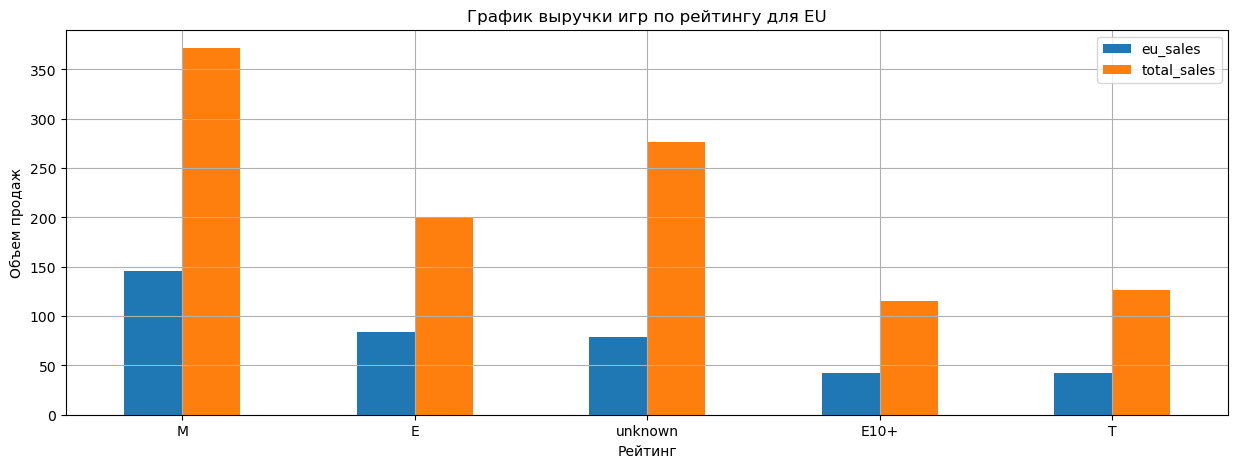

In [75]:
sales_by_rating_eu = (
    active_platforms_data
    .pivot_table(index='rating', values=['eu_sales', 'total_sales'], aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False))
sales_by_rating_eu.plot(kind='bar', grid=True, figsize=(15,5))
plt.xlabel('Рейтинг')
plt.ylabel('Объем продаж')
plt.xticks(rotation=0)
plt.title('График выручки игр по рейтингу для EU')
plt.show()

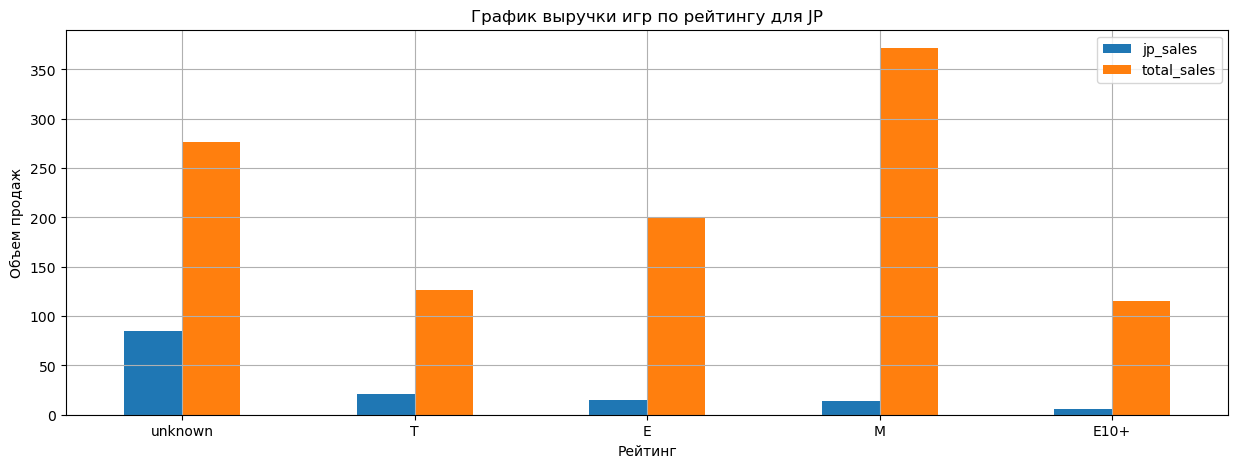

In [76]:
sales_by_rating_jp = (
    active_platforms_data
    .pivot_table(index='rating', values=['jp_sales', 'total_sales'], aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False))
sales_by_rating_jp.plot(kind='bar', grid=True, figsize=(15,5))
plt.xlabel('Рейтинг')
plt.ylabel('Объем продаж')
plt.xticks(rotation=0)
plt.title('График выручки игр по рейтингу для JP')
plt.show()

- В Европе и Северной Америке наиболее популярны игры с рейтингом М;
- В Европе и Северной Америке наимнее популярны игры с рейтингом T;
- Сделать однозначный вывод по Японии сложно, т.к. в Японии имеется свой рейтинг и большинство игр нельзя отнести к рейтингу из рассматриваемых данных.

### Вывод

Изучив данные можно сказать, что:
- Предпочтения пользователей из Северной Америки по платформам и жанрам схожи, но на американский рынок, как правило, приходятся большие продажи;
- Из перспективных платформ, основный рынок у X360 - NA, а у PS4 - EU;
- Самый прибыльный жанр Shooter находится на втором месте по доле в NA и EU, при этом совершенно не популярен в JP;
- Японский рынок сильно отличается по самой популярной платформе (3DS) и жанру (Role-Playing);
- XOne имеет крайне низкие продажи в Японии;
- Рейтинг ESRB одинаково влияет на продажи в Европе и Северной Америке. Больше всего продаж приходится на игры с рейтингом М.

## Этап 5. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_0 = Пользовательские рейтинги (user_score) для платформы Xbox One = пользовательские рейтинги (user_score) для платформы PC.

H_1 = Пользовательские рейтинги (user_score) для платформы Xbox One ≠ пользовательские рейтинги (user_score) для платформы PC.

In [77]:
xbox_one_user_score = active_platforms_data[(active_platforms_data['platform'] == 'XOne') 
                                            & (active_platforms_data['user_score'] 
                                               < 11)]['user_score']
pc_user_score = active_platforms_data[(active_platforms_data['platform'] == 'PC') 
                                      & (active_platforms_data['user_score'] 
                                         < 11)]['user_score']
results = st.ttest_ind(xbox_one_user_score, pc_user_score, equal_var=False)

alpha = 0.05

if results.pvalue < alpha:
    print(results.pvalue, '\nОтвергаем нулевую гипотезу')
else:
    print(results.pvalue, '\nНе получилось отвергнуть нулевую гипотезу')        

0.14759594013430463 
Не получилось отвергнуть нулевую гипотезу


In [78]:
xbox_one_user_score.mean()

6.52142857142857

In [79]:
pc_user_score.mean()

6.269677419354836

Таким образом, нет причин считать, что пользовательские рейтинги платформ Xbox One и PC неодинаковы.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

H_0 = Пользовательские рейтинги (user_score) для жанра Action = пользовательские рейтинги (user_score) для жанра Sports.

H_1 = Пользовательские рейтинги (user_score) для жанра Action ≠ пользовательские рейтинги (user_score) для жанра Sports.

In [80]:
action_user_score = active_platforms_data[(active_platforms_data['genre'] == 'Action') 
                                          & (active_platforms_data['user_score'] 
                                             < 11)]['user_score']
sports_user_score = active_platforms_data[(active_platforms_data['genre'] == 'Sports') 
                                          & (active_platforms_data['user_score'] 
                                             < 11)]['user_score']

results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)

alpha = 0.05

if results.pvalue < alpha:
    print(results.pvalue, '\nОтвергаем нулевую гипотезу')
else:
    print(results.pvalue, '\nНе получилось отвергнуть нулевую гипотезу')

1.4460039700704315e-20 
Отвергаем нулевую гипотезу


In [81]:
action_user_score.mean()

6.837532133676097

In [82]:
sports_user_score.mean()

5.238124999999999

Вероятность слишком большая, чтобы утверждать о неравенстве пользовательских оценок.

Был применен t-test, т.к. выборки не зависит друг от друга. Так как выборки разного размера можно предположить, что дисперсии разные, поэтому параметр equal_var указан как False.

## Этап 6. Общий вывод

Было проведено исследование исторических данных о продажах игр для разных платформ.

**Цель исследования** - определить факторы коммерческого успеха видеоигр.

В результате исследования были получены **следующие результаты**:

- Основываясь на данные актуального периода (с 2013 по 2016 год) можно выделить 2 наиболее перспективные платформы, которые должны продолжить расти в следующем году. Это PS4 и XOne. Они находятся на 4ом и 5ом году своего жизненного цикла на момент исслендования.

- Медианные продажи на XOne выше, чем на PS4. Если сравнить их с медианными продажами этих конкурентов прошлого поколения, то медианные продажи у X360 выше, чем у PS3.

- При рассмотрении жанров было определенно, что наиболее прибыльным жанром является Shooter. 

- Если рассматривать глобальный рынок, наиболее успешные продажи XOne показывает на американском рынке, PS4 - на европейском. При этом PS4 все равно лидирует как на рынке EU, так и NA. Но на рынке NA отставание XOne гораздо ниже. Японский рынок сильно отличается, по популярности на нем лидирует 3DS, XOne - один из худших продажам, а PS4 - на третьем месте.

- Предпочтения по жанрам в Европе и Северной Америки похожи, топ-3: Action, Shooter, Sports. В Японии предпочтения по жанравм также сильно отличаются как и по платформам, в лидерах жанр Role-Playing. 

- Рейтинг M наиболее коммерчески успешный для рынков Европы и Северной Америке.

- Оценки критиков и в особенности пользователей не влияют на продажи.

